In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
import pandas as pd
import os

In [ ]:
if os.path.exists("reliance.csv"):
    data = pd.read_csv("reliance.csv", index_col=0)
else:
    ticker = yf.Ticker("^NSEBANK")
    data = ticker.history(period="max")
    data.to_csv("reliance.csv")

In [ ]:
data


In [ ]:
df = pd.DataFrame(data)
df = df[df['Volume'] != 0]

print(df)

In [ ]:
df['Close'].plot()

In [ ]:
csv_file_path = 'output.csv'

# Write the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

In [ ]:
train_data = df.iloc[:int(0.80 * len(df)), :]
test_data = df.iloc[int(0.80 * len(df)):, :]

In [ ]:
features=['Open','High','Low','Volume']
target='Close'

In [ ]:
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions=model.predict(test_data[features])
print('Model Prediction')
print(predictions)

Model Prediction
[40953.703 41816.25  41683.176 41779.04  42378.33  42308.707 42285.945
 42217.24  42324.34  42623.844 42529.504 42787.098 43012.156 43430.53
 43274.13  43415.055 43001.78  43156.51  43308.062 43153.758 43824.82
 43669.17  43809.168 43823.96  43860.656 43851.777 43824.82  43824.82
 43795.7   43823.117 43309.83  43802.168 43823.117 43795.152 43904.035
 43824.82  43804.434 43804.434 43804.434 43804.434 43809.168 43799.07
 43817.547 43809.168 43812.594 43851.777 43851.777 43851.777 43809.168
 43770.11  43836.098 43809.168 43804.434 43799.07  43843.8   43824.82
 43851.777 43600.543 43518.03  43843.8   43823.96  43823.96  43849.65
 43851.777 43944.605 43827.242 43856.703 43971.105 43799.582 43880.92
 43851.777 43799.863 43851.777 43904.035 43885.86  43824.82  43856.703
 43803.45  43851.777 43856.703 43834.156 43848.87  43851.777 43817.48
 43851.777 43827.242 43817.902 43836.098 43790.492 43799.07  43809.168
 43863.836 43823.96  43768.52  43809.168 43795.7   43812.594 43646.0

In [ ]:
print('Actual Values')
print(test_data[target])

Actual Values
Date
2023-04-11 00:00:00+05:30    41366.500000
2023-04-12 00:00:00+05:30    41557.949219
2023-04-13 00:00:00+05:30    42132.550781
2023-04-17 00:00:00+05:30    42262.550781
2023-04-18 00:00:00+05:30    42265.199219
                                 ...     
2024-03-26 00:00:00+05:30    46600.199219
2024-03-27 00:00:00+05:30    46785.949219
2024-03-28 00:00:00+05:30    47124.601562
2024-04-01 00:00:00+05:30    47578.250000
2024-04-02 00:00:00+05:30    47545.449219
Name: Close, Length: 237, dtype: float64


In [ ]:
accuracy=model.score(test_data[features],test_data[target])
print('accuracy')
print (accuracy)

accuracy
-0.5190538179360171


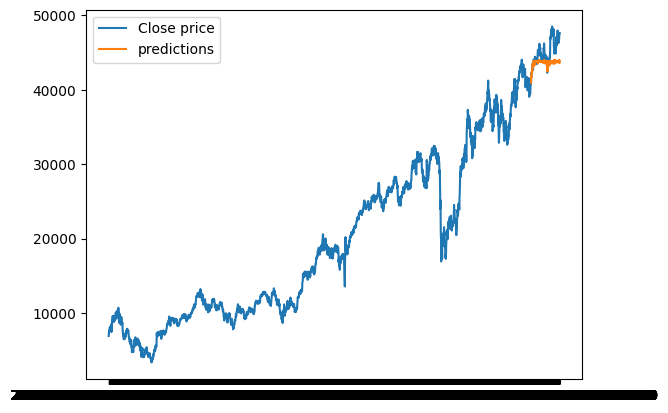

In [ ]:
plt.plot(data['Close'],label='Close price')
plt.plot(test_data[target].index,predictions,label='predictions')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf

# Get the most recent trading day's stock data for a specific ticker symbol (e.g., AAPL for Apple Inc.)
ticker_symbol = "^NSEBANK"
latest_data = yf.download(ticker_symbol, period="1d")  # Fetch data for the last trading day

# Extract latest Open, High, Low, Close, and Volume data
latest_open = latest_data['Open'][0]
latest_high = latest_data['High'][0]
latest_low = latest_data['Low'][0]
latest_close = latest_data['Close'][0]
latest_volume = latest_data['Volume'][0]

# Create feature data for future dates
future_dates = pd.date_range(start='2024-04-04', periods=1, freq='D')
future_data = pd.DataFrame({'Date': future_dates})
future_data['Date_numeric'] = future_data['Date'].astype(int)

# Fill placeholder values for 'Open', 'High', 'Low', 'Close', and 'Volume' with the latest data
future_data['Open'] = latest_open
future_data['High'] = latest_high
future_data['Low'] = latest_low
future_data['Close'] = latest_close
future_data['Volume'] = latest_volume

# Predict future stock prices
future_prices = model.predict(future_data[features])

# Print the predicted future prices
for date, price in zip(future_dates, future_prices):
    print(f"Date: {date}, Predicted Close Price: {price}")


[*********************100%%**********************]  1 of 1 completed

Date: 2023-10-25 00:00:00, Predicted Close Price: 43746.7421875


Model Accuracy: 0.9994446768888976


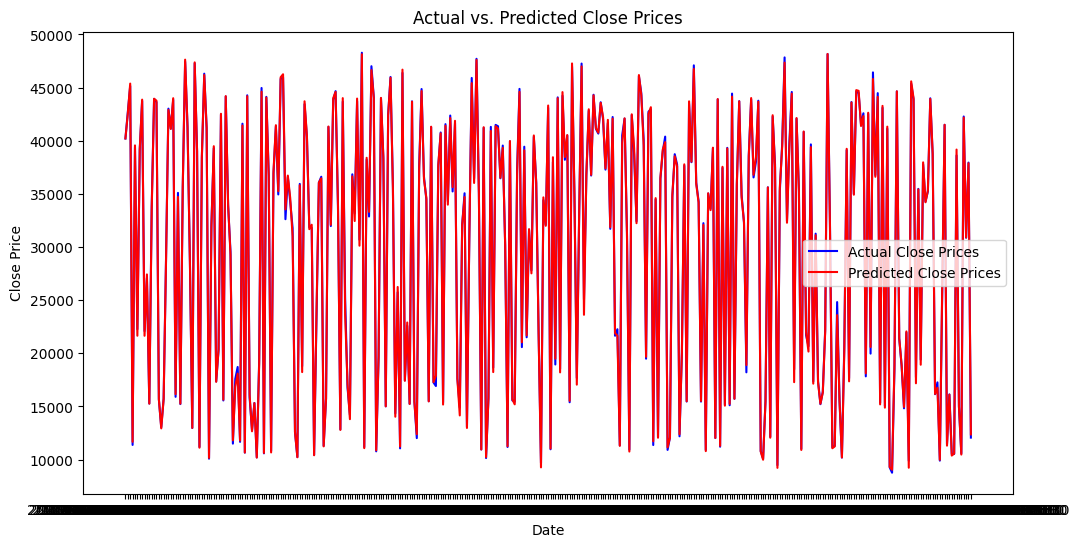

Date: 2023-10-25 00:00:00, Predicted Close Price: 47354.58984375


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load data
if os.path.exists("reliance.csv"):
    data = pd.read_csv("reliance.csv", index_col=0)
else:
    ticker = yf.Ticker("^NSEBANK")
    data = ticker.history(period="max")
    data.to_csv("reliance.csv")

# Data cleaning
df = pd.DataFrame(data)
df = df[df['Volume'] != 0]

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Split data into features and target variable
X = df[features]
y = df[target]

# Randomly split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print('Model Accuracy:', accuracy)

# Visualization (plotting actual vs. predicted values)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Prices', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Close Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()

# Predict future stock prices (assuming future_data DataFrame is already prepared as shown in your previous code)
future_prices = model.predict(future_data[features])

# Print the predicted future prices
for date, price in zip(future_dates, future_prices):
    print(f"Date: {date}, Predicted Close Price: {price}")


Best Model Accuracy: 0.9994898612511441
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


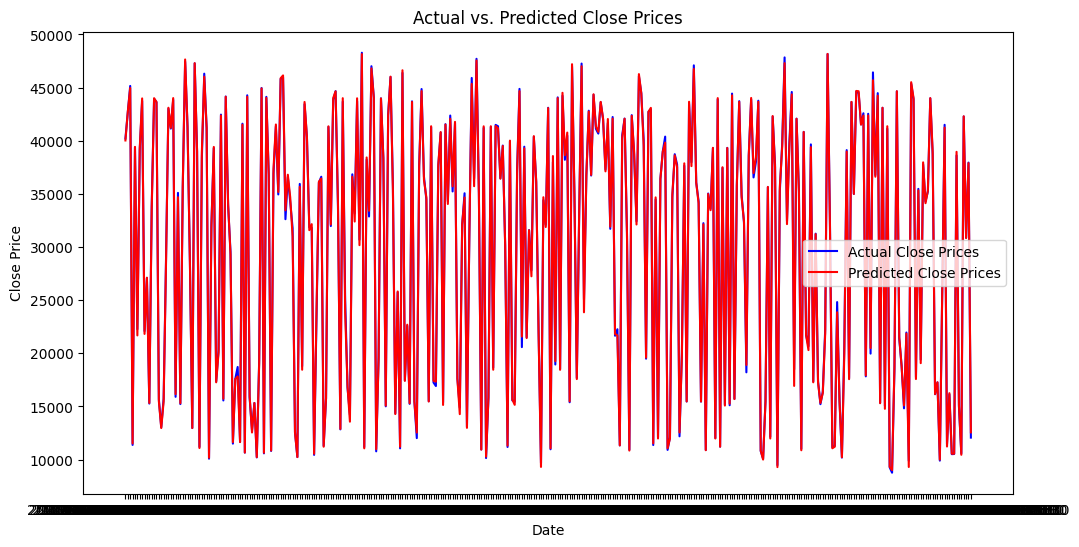

Date: 2023-10-25 00:00:00, Predicted Close Price: 47470.046875


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Load data
if os.path.exists("reliance.csv"):
    data = pd.read_csv("reliance.csv", index_col=0)
else:
    ticker = yf.Ticker("^NSEBANK")
    data = ticker.history(period="max")
    data.to_csv("reliance.csv")

# Data cleaning
df = pd.DataFrame(data)
df = df[df['Volume'] != 0]

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Split data into features and target variable
X = df[features]
y = df[target]

# Randomly split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print('Best Model Accuracy:', accuracy)
print('Best Parameters:', best_params)

# Visualization (plotting actual vs. predicted values)
predictions = best_model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Prices', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Close Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()

# Predict future stock prices (assuming future_data DataFrame is already prepared as shown in your previous code)
future_prices = best_model.predict(future_data[features])

# Print the predicted future prices
for date, price in zip(future_dates, future_prices):
    print(f"Date: {date}, Predicted Close Price: {price}")


Best Model Accuracy for Open Prices: 0.9998800067883173
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


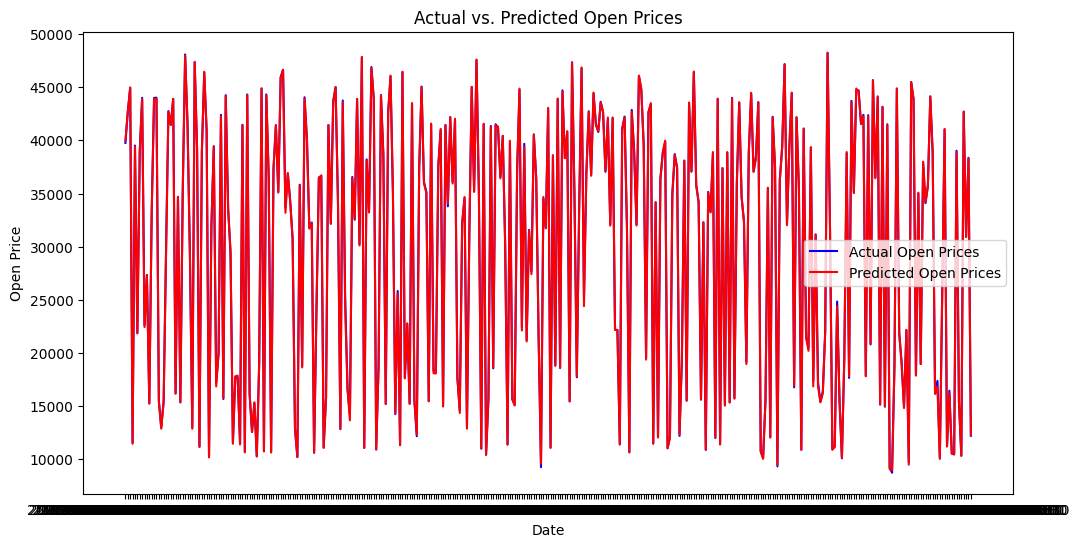

Date: 2024-04-04 00:00:00, Predicted Open Price: 47370.765625


In [ ]:
#Open Price Prediction

import os
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import yfinance as yf  # You also need to import yfinance for fetching data

# Load data
if os.path.exists("reliance.csv"):
    data = pd.read_csv("reliance.csv", index_col=0)
else:
    ticker = yf.Ticker("^NSEBANK")  # Assuming you want to fetch data for Reliance Industries (RELIANCE.NS) stock
    data = ticker.history(period="max")
    data.to_csv("reliance.csv")

# Data cleaning
df = pd.DataFrame(data)
df = df[df['Volume'] != 0]

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume']  # Include 'Open' in features for predicting Open prices
target = 'Open'  # Set the target variable as 'Open'

# Split data into features and target variable
X = df[features]
y = df[target]

# Randomly split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print('Best Model Accuracy for Open Prices:', accuracy)
print('Best Parameters:', best_params)

# Visualization (plotting actual vs. predicted values for Open Prices)
predictions = best_model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Open Prices', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Open Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Actual vs. Predicted Open Prices')
plt.legend()
plt.show()

# Predict future stock Open prices (assuming future_data DataFrame is already prepared as shown in your previous code)
future_open_prices = best_model.predict(future_data[features])

# Print the predicted future Open prices
for date, price in zip(future_dates, future_open_prices):
    print(f"Date: {date}, Predicted Open Price: {price}")


Predicting Open Prices:
Best Model Accuracy for Open Prices: 0.9998800067883173
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


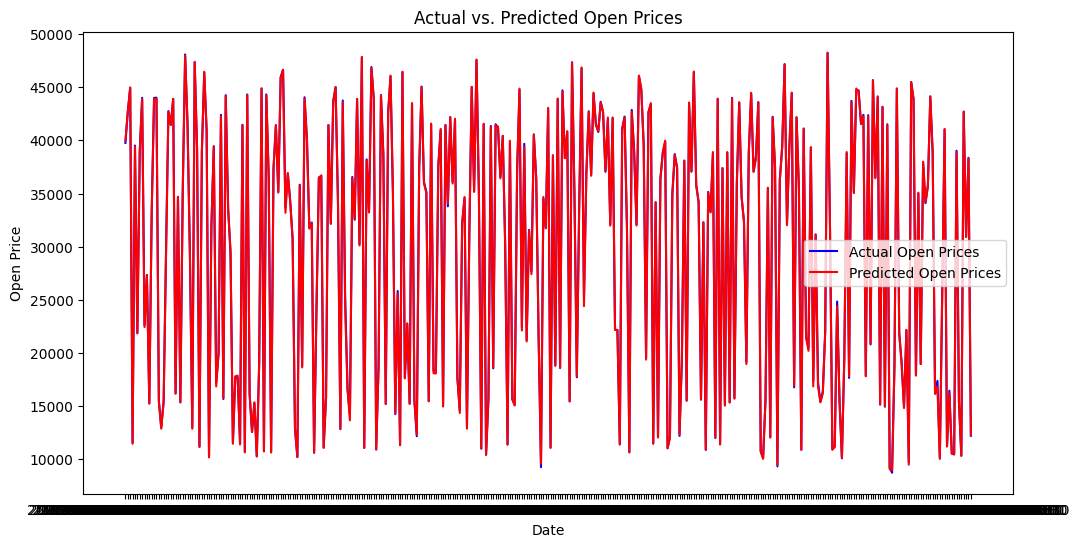

Date: 2023-10-25 00:00:00, Predicted Open Price: 47370.765625
Predicting High Prices:
Best Model Accuracy for High Prices: 0.9998305029881753
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


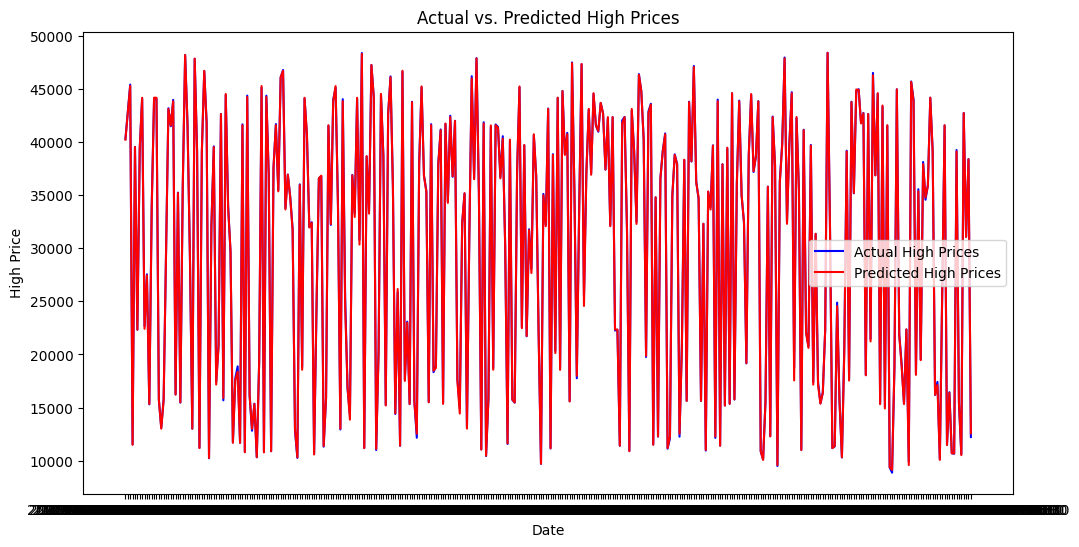

Date: 2023-10-25 00:00:00, Predicted High Price: 47665.19921875
Predicting Low Prices:
Best Model Accuracy for Low Prices: 0.999766091932063
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


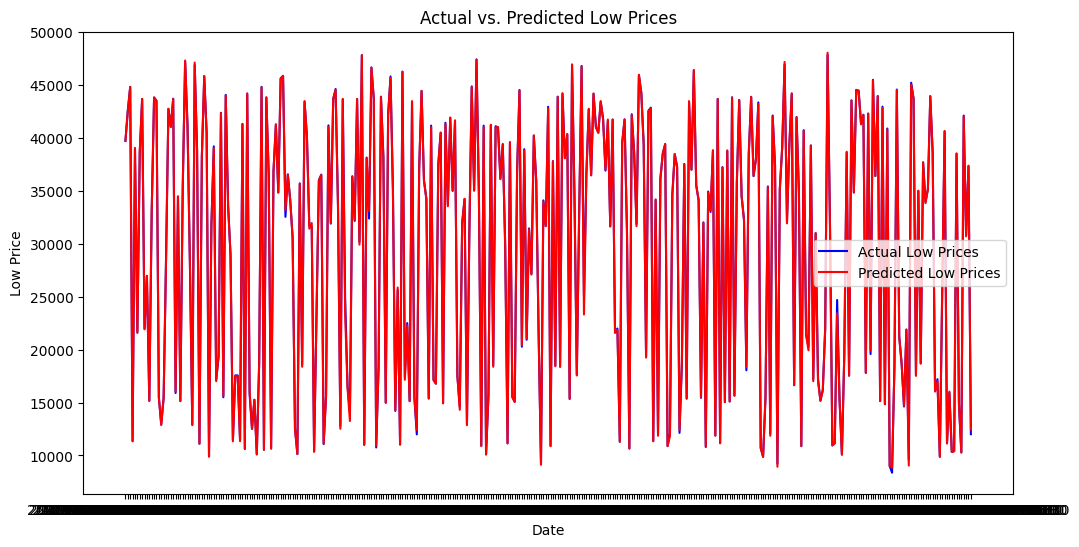

Date: 2023-10-25 00:00:00, Predicted Low Price: 47220.8046875
Predicting Close Prices:
Best Model Accuracy for Close Prices: 0.9994898612511441
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


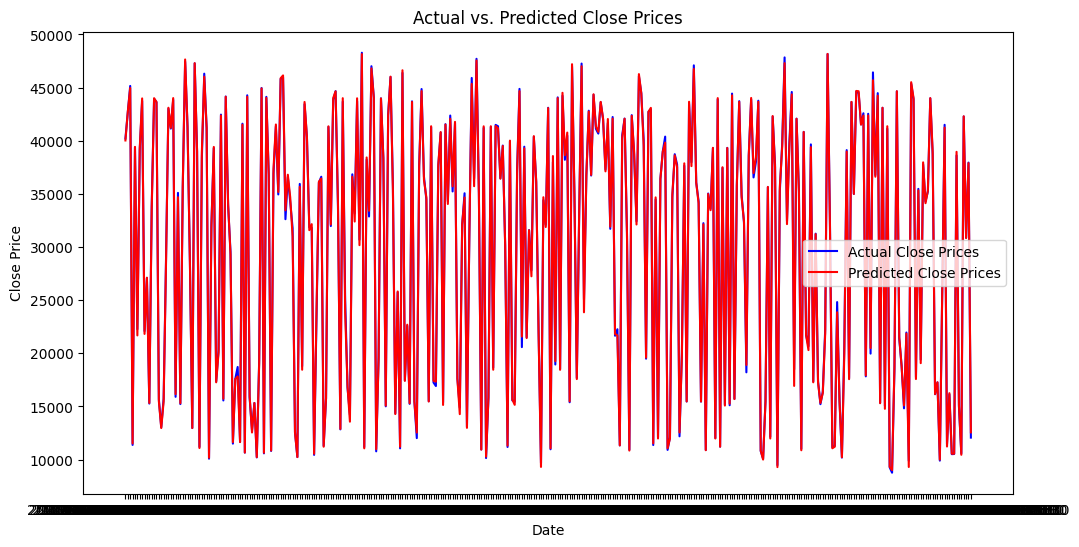

Date: 2023-10-25 00:00:00, Predicted Close Price: 47470.046875


In [ ]:
# Define features and target variables for High, Low, Open, and Close prices
features = ['Open', 'High', 'Low', 'Volume']  # Features remain the same for all target variables
targets = ['Open', 'High', 'Low', 'Close']  # List of target variables

# Iterate through each target variable and perform predictions
for target in targets:
    print(f"Predicting {target} Prices:")
    # Split data into features and current target variable
    y = df[target]

    # Randomly split the data into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create an XGBoost regressor
    xgb_reg = xgb.XGBRegressor()

    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    accuracy = best_model.score(X_test, y_test)
    print(f'Best Model Accuracy for {target} Prices:', accuracy)
    print('Best Parameters:', best_params)

    # Visualization (plotting actual vs. predicted values for current target variable)
    predictions = best_model.predict(X_test)
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test.values, label=f'Actual {target} Prices', color='blue')
    plt.plot(y_test.index, predictions, label=f'Predicted {target} Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel(f'{target} Price')
    plt.title(f'Actual vs. Predicted {target} Prices')
    plt.legend()
    plt.show()

    # Predict future stock target prices (assuming future_data DataFrame is already prepared as shown in your previous code)
    future_target_prices = best_model.predict(future_data[features])

    # Print the predicted future target prices
    for date, price in zip(future_dates, future_target_prices):
        print(f"Date: {date}, Predicted {target} Price: {price}")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset into the 'df' DataFrame

# Define features and target variables
features = ['Open', 'High', 'Low', 'Volume']
targets = ['Open', 'High', 'Low', 'Close']

# Iterate through each target variable and perform predictions
for target in targets:
    print(f"Predicting {target} Prices:")
    # Split data into features and current target variable
    y = df[target]
    X = df[features]

    # Randomly split the data into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create an XGBoost regressor
    xgb_reg = xgb.XGBRegressor()

    # Perform Grid Search with 5-fold cross-validation
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1, 0.01, 0.05]
    }
    grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model using appropriate metrics
    predictions = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print('Best Parameters:', best_params)

    # Visualization (plotting actual vs. predicted values for current target variable)
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test.values, label=f'Actual {target} Prices', color='blue')
    plt.plot(y_test.index, predictions, label=f'Predicted {target} Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel(f'{target} Price')
    plt.title(f'Actual vs. Predicted {target} Prices')
    plt.legend()
    plt.show()

    # Predict future stock target prices (assuming future_data DataFrame is already prepared)
    future_target_prices = best_model.predict(future_data[features])

    # Print the predicted future target prices
    for date, price in zip(future_data.index, future_target_prices):
        print(f"Date: {date}, Predicted {target} Price: {price}")


In [ ]:
import pandas as pd
from textblob import TextBlob

# Sample data: list of news headlines
news_headlines = [
    "FPIs offload ₹9,784 cr in Indian equities; extend selling streak into October", "TCS, HCL Tech, Glenmark Life Sciences, others to trade ex-dividend next week","Small-cap stock at new high after Q2 results. Axis Securities sees more upside","Multibagger PSU stock jumps 150% in six months. Experts see more upside"
]

# Perform sentiment analysis on news headlines
sentiment_scores = []
for headline in news_headlines:
    analysis = TextBlob(headline)
    # Sentiment polarity ranges from -1 to 1 (-1: negative, 0: neutral, 1: positive)
    sentiment_scores.append(analysis.sentiment.polarity)

# Create a DataFrame with news headlines and sentiment scores
data = {'Headline': news_headlines, 'Sentiment_Score': sentiment_scores}
df = pd.DataFrame(data)

# Classify sentiment categories based on scores (optional)
df['Sentiment_Category'] = df['Sentiment_Score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
print(df)
